In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import mysql.connector
from mysql.connector import Error

def create_connection(host, user, password, database):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )
        print("MySQL Database connection successful")
    except Error as e:
        print(f"The error '{e}' occurred")
    return connection

def select_rows(cursor, table_name):
    query = f"SELECT * FROM {table_name}"
    try:
        cursor.execute(query)
        rows = cursor.fetchall()
        return rows
    except Error as e:
        print(f"The error '{e}' occurred")

# MySQL database connection parameters
host = '127.0.0.1'
user = 'root'
password = 'Aswingr@1620'
database = 'train'

# Create a connection to MySQL database
connection = create_connection(host, user, password, database)

# Table name from where you want to retrieve the data
table_name = 'questions'

# Retrieve data from MySQL table
if connection:
    try:
        cursor = connection.cursor()
        rows = select_rows(cursor, table_name)
        if rows:
            # Convert fetched rows to DataFrame
            df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
            print(df)
        else:
            print("No data found in the table")
    finally:
        # Close the cursor and the database connection
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


MySQL Database connection successful
            id    qid1    qid2  \
0            1       1       2   
1            2       5       6   
2            3       7       8   
3            4       9      10   
4            5      11      12   
...        ...     ...     ...   
404281  404285  433578  379845   
404282  404286   18840  155606   
404283  404287  537928  537929   
404284  404288  537930  537931   
404285  404289  537932  537933   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       How can I increase the speed of my internet co...   
2       Why am I mentally very lonely? How can I solve...   
3       Which one dissolve in water quikly sugar, salt...   
4       Astrology: I am a Capricorn Sun Cap moon and c...   
...                                                   ...   
404281  How many keywords are there in the Racket prog...   
404282          Do you believe there is life after death?   
40428

In [3]:
new_df = df.sample(30000,random_state=2)

In [4]:
new_df.head()

id    qid1    qid2  \
385890  385894  518057  518058   
94973    94974  158504  158505   
138115  138117  220010  220011   
238776  238779   17029   24406   
260142  260145  185246  376034   

                                                question1  \
385890  Is The Master Resource Book in MATHEMATICS for...   
94973   Should I lose my body fat before trying to bui...   
138115  Why are there so many Gods in Asian countries ...   
238776                  How can I lose weight in 21 days?   
260142            How do you develop photographic memory?   

                                                question2  is_duplicate  
385890  Is the master resource book In chemistry for t...             0  
94973   My body type is endomorph. In what way do I lo...             0  
138115  Why there are so many gods in Asian countries ...             1  
238776                     How can I lose fat in 10 days?             0  
260142   What can I do to improve my photographic memory?             0

In [5]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [6]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [7]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [8]:
new_df.head()

id    qid1    qid2  \
385890  385894  518057  518058   
94973    94974  158504  158505   
138115  138117  220010  220011   
238776  238779   17029   24406   
260142  260145  185246  376034   

                                                question1  \
385890  is the master resource book in mathematics for...   
94973   should i lose my body fat before trying to bui...   
138115  why are there so many gods in asian countries ...   
238776                   how can i lose weight in 21 days   
260142             how do you develop photographic memory   

                                                question2  is_duplicate  
385890  is the master resource book in chemistry for t...             0  
94973   my body type is endomorph  in what way do i lo...             0  
138115  why there are so many gods in asian countries ...             1  
238776                      how can i lose fat in 10 days             0  
260142    what can i do to improve my photographic memory             0

In [9]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [10]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
385890  385894  518057  518058   
94973    94974  158504  158505   
138115  138117  220010  220011   
238776  238779   17029   24406   
260142  260145  185246  376034   

                                                question1  \
385890  is the master resource book in mathematics for...   
94973   should i lose my body fat before trying to bui...   
138115  why are there so many gods in asian countries ...   
238776                   how can i lose weight in 21 days   
260142             how do you develop photographic memory   

                                                question2  is_duplicate  \
385890  is the master resource book in chemistry for t...             0   
94973   my body type is endomorph  in what way do i lo...             0   
138115  why there are so many gods in asian countries ...             1   
238776                      how can i lose fat in 10 days             0   
260142    what can i do to improve my photographic memory             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
385890      71      74            13            14  
94973       55      81            11            19  
138115      71      70            16            15  
238776      32      29             8             8  
260142      38      47             6             9

In [11]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [12]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
385890  385894  518057  518058   
94973    94974  158504  158505   
138115  138117  220010  220011   
238776  238779   17029   24406   
260142  260145  185246  376034   

                                                question1  \
385890  is the master resource book in mathematics for...   
94973   should i lose my body fat before trying to bui...   
138115  why are there so many gods in asian countries ...   
238776                   how can i lose weight in 21 days   
260142             how do you develop photographic memory   

                                                question2  is_duplicate  \
385890  is the master resource book in chemistry for t...             0   
94973   my body type is endomorph  in what way do i lo...             0   
138115  why there are so many gods in asian countries ...             1   
238776                      how can i lose fat in 10 days             0   
260142    what can i do to improve my photographic memory             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
385890      71      74            13            14           11  
94973       55      81            11            19            6  
138115      71      70            16            15           14  
238776      32      29             8             8            6  
260142      38      47             6             9            3

In [13]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [14]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
385890  385894  518057  518058   
94973    94974  158504  158505   
138115  138117  220010  220011   
238776  238779   17029   24406   
260142  260145  185246  376034   

                                                question1  \
385890  is the master resource book in mathematics for...   
94973   should i lose my body fat before trying to bui...   
138115  why are there so many gods in asian countries ...   
238776                   how can i lose weight in 21 days   
260142             how do you develop photographic memory   

                                                question2  is_duplicate  \
385890  is the master resource book in chemistry for t...             0   
94973   my body type is endomorph  in what way do i lo...             0   
138115  why there are so many gods in asian countries ...             1   
238776                      how can i lose fat in 10 days             0   
260142    what can i do to improve my photographic memory             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
385890      71      74            13            14           11          26  
94973       55      81            11            19            6          27  
138115      71      70            16            15           14          28  
238776      32      29             8             8            6          16  
260142      38      47             6             9            3          15

In [15]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
385890  385894  518057  518058   
94973    94974  158504  158505   
138115  138117  220010  220011   
238776  238779   17029   24406   
260142  260145  185246  376034   

                                                question1  \
385890  is the master resource book in mathematics for...   
94973   should i lose my body fat before trying to bui...   
138115  why are there so many gods in asian countries ...   
238776                   how can i lose weight in 21 days   
260142             how do you develop photographic memory   

                                                question2  is_duplicate  \
385890  is the master resource book in chemistry for t...             0   
94973   my body type is endomorph  in what way do i lo...             0   
138115  why there are so many gods in asian countries ...             1   
238776                      how can i lose fat in 10 days             0   
260142    what can i do to improve my photographic memory             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
385890      71      74            13            14           11          26   
94973       55      81            11            19            6          27   
138115      71      70            16            15           14          28   
238776      32      29             8             8            6          16   
260142      38      47             6             9            3          15   

        word_share  
385890        0.42  
94973         0.22  
138115        0.50  
238776        0.38  
260142        0.20

In [16]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [17]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [18]:
new_df.head()

id    qid1    qid2  \
385890  385894  518057  518058   
94973    94974  158504  158505   
138115  138117  220010  220011   
238776  238779   17029   24406   
260142  260145  185246  376034   

                                                question1  \
385890  is the master resource book in mathematics for...   
94973   should i lose my body fat before trying to bui...   
138115  why are there so many gods in asian countries ...   
238776                   how can i lose weight in 21 days   
260142             how do you develop photographic memory   

                                                question2  is_duplicate  \
385890  is the master resource book in chemistry for t...             0   
94973   my body type is endomorph  in what way do i lo...             0   
138115  why there are so many gods in asian countries ...             1   
238776                      how can i lose fat in 10 days             0   
260142    what can i do to improve my photographic memory             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
385890      71      74            13            14  ...          26   
94973       55      81            11            19  ...          27   
138115      71      70            16            15  ...          28   
238776      32      29             8             8  ...          16   
260142      38      47             6             9  ...          15   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
385890        0.42  0.749991  0.749991  0.999980  0.999980  0.846147   
94973         0.22  0.666656  0.499994  0.399992  0.285710  0.545450   
138115        0.50  0.999988  0.999988  0.999980  0.999980  0.999992   
238776        0.38  0.499988  0.499988  0.999975  0.999975  0.749991   
260142        0.20  0.666644  0.666644  0.333322  0.166664  0.499992   

         ctc_max  last_word_eq  first_word_eq  
385890  0.785709           1.0            1.0  
94973   0.333331           0.0            0.0  
138115  0.999992           1.0            1.0  
238776  0.749991           1.0            1.0  
260142  0.333330           1.0            0.0  

[5 rows x 21 columns]

In [19]:
import Levenshtein

def longest_common_substring(s1, s2):
    m = [[0] * (1 + len(s2)) for i in range(1 + len(s1))]
    longest, x_longest = 0, 0
    for x in range(1, 1 + len(s1)):
        for y in range(1, 1 + len(s2)):
            if s1[x - 1] == s2[y - 1]:
                m[x][y] = m[x - 1][y - 1] + 1
                if m[x][y] > longest:
                    longest = m[x][y]
                    x_longest = x
            else:
                m[x][y] = 0
    return s1[x_longest - longest: x_longest]

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    common_substring = longest_common_substring(q1, q2)
    length_features[2] = len(common_substring) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [20]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [21]:
new_df.head()

id    qid1    qid2  \
385890  385894  518057  518058   
94973    94974  158504  158505   
138115  138117  220010  220011   
238776  238779   17029   24406   
260142  260145  185246  376034   

                                                question1  \
385890  is the master resource book in mathematics for...   
94973   should i lose my body fat before trying to bui...   
138115  why are there so many gods in asian countries ...   
238776                   how can i lose weight in 21 days   
260142             how do you develop photographic memory   

                                                question2  is_duplicate  \
385890  is the master resource book in chemistry for t...             0   
94973   my body type is endomorph  in what way do i lo...             0   
138115  why there are so many gods in asian countries ...             1   
238776                      how can i lose fat in 10 days             0   
260142    what can i do to improve my photographic memory             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
385890      71      74            13            14  ...  0.749991  0.999980   
94973       55      81            11            19  ...  0.499994  0.399992   
138115      71      70            16            15  ...  0.999988  0.999980   
238776      32      29             8             8  ...  0.499988  0.999975   
260142      38      47             6             9  ...  0.666644  0.333322   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
385890  0.999980  0.846147  0.785709           1.0            1.0   
94973   0.285710  0.545450  0.333331           0.0            0.0   
138115  0.999980  0.999992  0.999992           1.0            1.0   
238776  0.999975  0.749991  0.749991           1.0            1.0   
260142  0.166664  0.499992  0.333330           1.0            0.0   

        abs_len_diff  mean_len  longest_substr_ratio  
385890           1.0      13.5              0.430556  
94973            7.0      14.5              0.232143  
138115           0.0      13.0              0.760563  
238776           0.0       8.0              0.500000  
260142           3.0       7.5              0.512821  

[5 rows x 24 columns]

In [22]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [23]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [24]:
print(new_df.shape)
new_df.head()

(30000, 28)


id    qid1    qid2  \
385890  385894  518057  518058   
94973    94974  158504  158505   
138115  138117  220010  220011   
238776  238779   17029   24406   
260142  260145  185246  376034   

                                                question1  \
385890  is the master resource book in mathematics for...   
94973   should i lose my body fat before trying to bui...   
138115  why are there so many gods in asian countries ...   
238776                   how can i lose weight in 21 days   
260142             how do you develop photographic memory   

                                                question2  is_duplicate  \
385890  is the master resource book in chemistry for t...             0   
94973   my body type is endomorph  in what way do i lo...             0   
138115  why there are so many gods in asian countries ...             1   
238776                      how can i lose fat in 10 days             0   
260142    what can i do to improve my photographic memory             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
385890      71      74            13            14  ...  0.785709   
94973       55      81            11            19  ...  0.333331   
138115      71      70            16            15  ...  0.999992   
238776      32      29             8             8  ...  0.749991   
260142      38      47             6             9  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
385890           1.0            1.0           1.0      13.5   
94973            0.0            0.0           7.0      14.5   
138115           1.0            1.0           0.0      13.0   
238776           1.0            1.0           0.0       8.0   
260142           1.0            0.0           3.0       7.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
385890              0.430556          90                  87   
94973               0.232143          50                  60   
138115              0.760563          94                  93   
238776              0.500000          85                  79   
260142              0.512821          68                  74   

        token_sort_ratio  token_set_ratio  
385890                81               88  
94973                 58               65  
138115               100              100  
238776                79               86  
260142                64               73  

[5 rows x 28 columns]

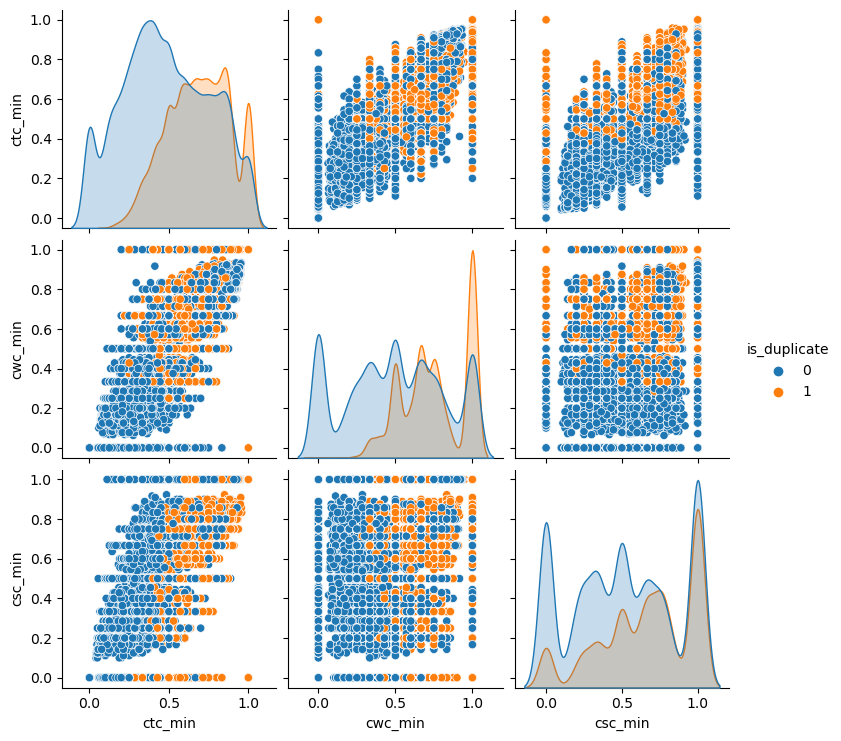

In [25]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

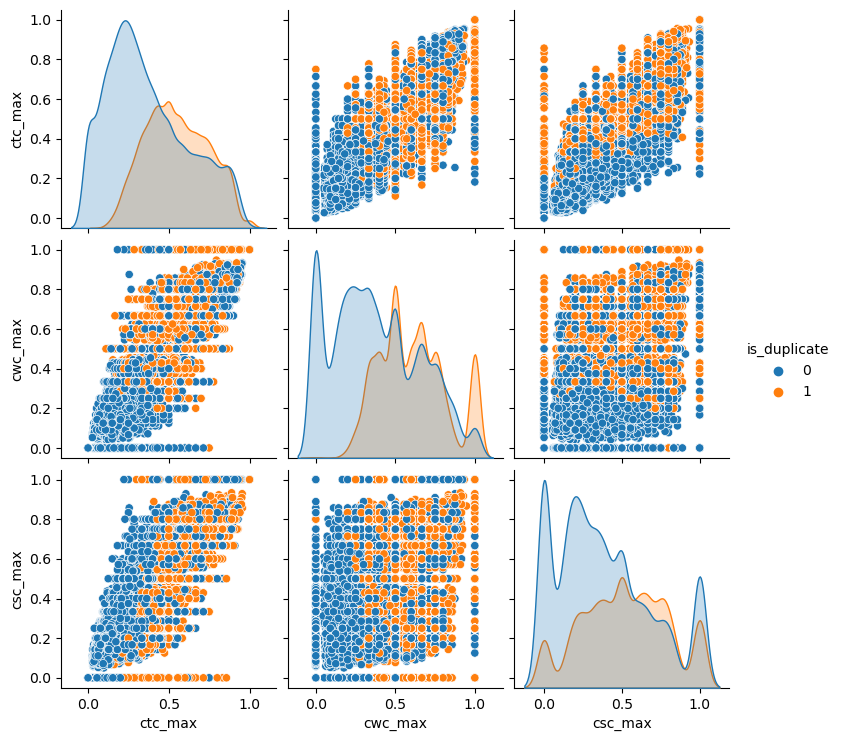

In [26]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

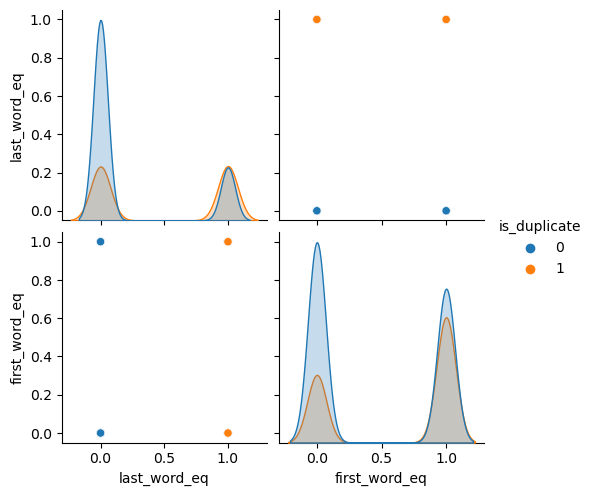

In [27]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

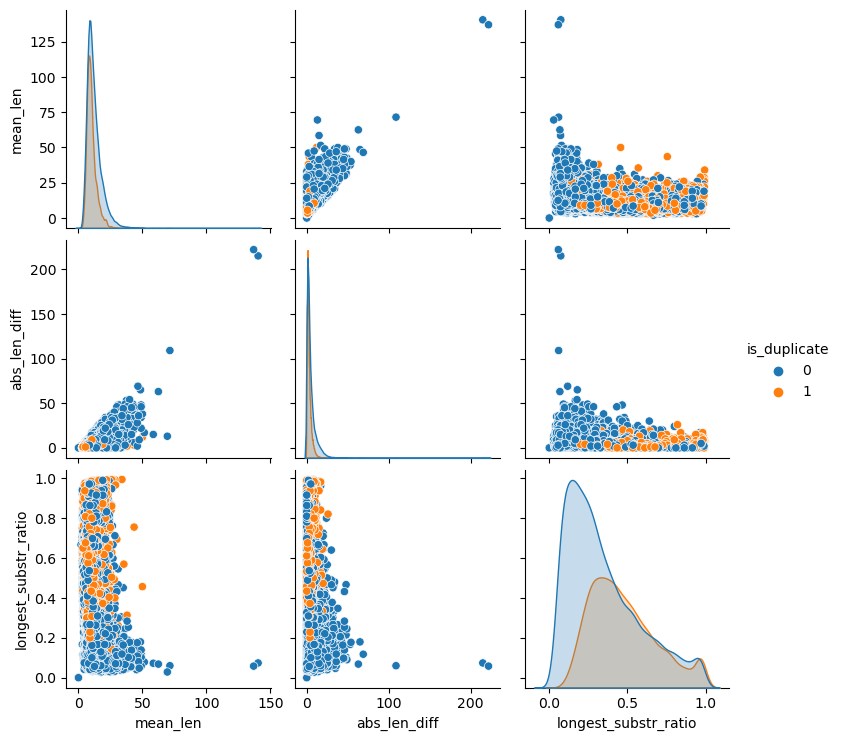

In [28]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

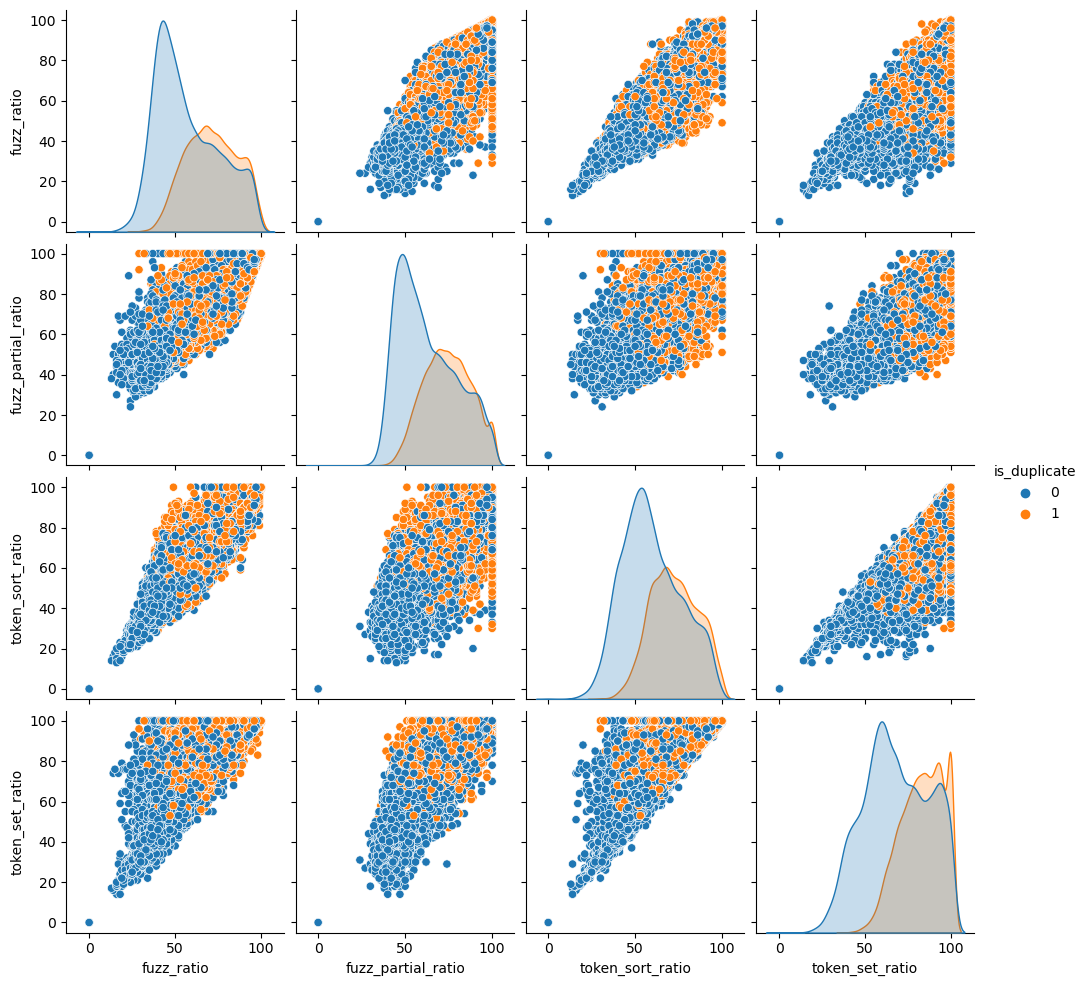

In [29]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [30]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [31]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.154s...
[t-SNE] Computed neighbors for 30000 samples in 12.621s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

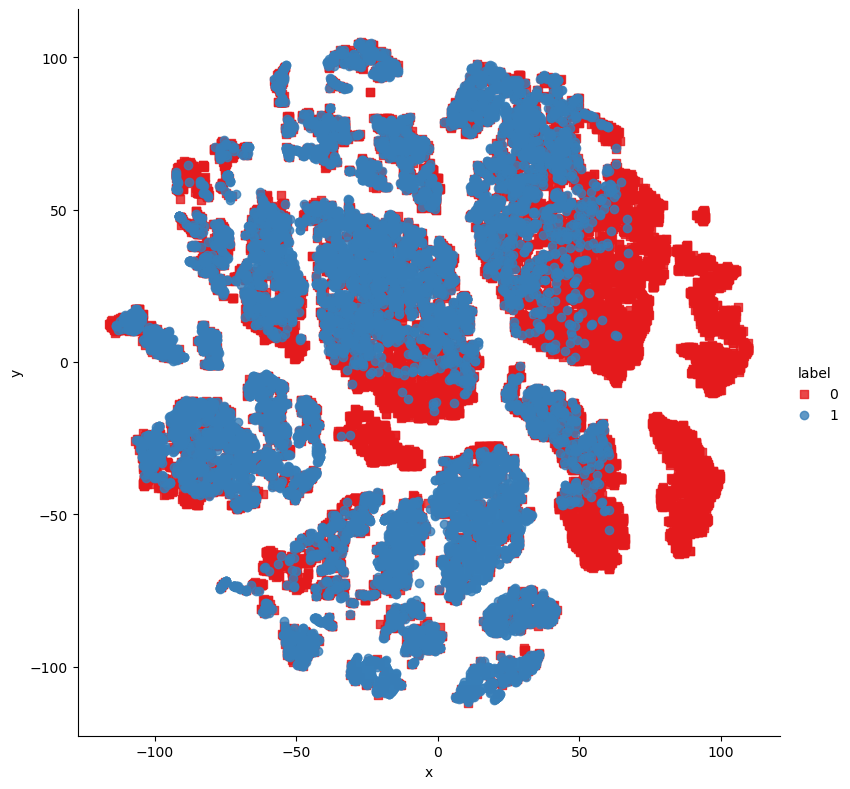

In [32]:
x_df = pd.DataFrame({'x': tsne2d[:, 0], 'y': tsne2d[:, 1], 'label': y})

# Draw the plot in the appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1", markers=['s', 'o'])

In [33]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.141s...
[t-SNE] Computed neighbors for 30000 samples in 12.535s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

In [34]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [35]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
385890  is the master resource book in mathematics for...   
94973   should i lose my body fat before trying to bui...   
138115  why are there so many gods in asian countries ...   
238776                   how can i lose weight in 21 days   
260142             how do you develop photographic memory   

                                                question2  
385890  is the master resource book in chemistry for t...  
94973   my body type is endomorph  in what way do i lo...  
138115  why there are so many gods in asian countries ...  
238776                      how can i lose fat in 10 days  
260142    what can i do to improve my photographic memory

In [36]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
385890             0      71      74            13            14           11   
94973              0      55      81            11            19            6   
138115             1      71      70            16            15           14   
238776             0      32      29             8             8            6   
260142             0      38      47             6             9            3   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
385890          26        0.42  0.749991  0.749991  ...  0.785709   
94973           27        0.22  0.666656  0.499994  ...  0.333331   
138115          28        0.50  0.999988  0.999988  ...  0.999992   
238776          16        0.38  0.499988  0.499988  ...  0.749991   
260142          15        0.20  0.666644  0.666644  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
385890           1.0            1.0           1.0      13.5   
94973            0.0            0.0           7.0      14.5   
138115           1.0            1.0           0.0      13.0   
238776           1.0            1.0           0.0       8.0   
260142           1.0            0.0           3.0       7.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
385890              0.430556          90                  87   
94973               0.232143          50                  60   
138115              0.760563          94                  93   
238776              0.500000          85                  79   
260142              0.512821          68                  74   

        token_sort_ratio  token_set_ratio  
385890                81               88  
94973                 58               65  
138115               100              100  
238776                79               86  
260142                64               73  

[5 rows x 23 columns]

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [38]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [39]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
385890             0      71      74            13            14           11   
94973              0      55      81            11            19            6   
138115             1      71      70            16            15           14   
238776             0      32      29             8             8            6   
260142             0      38      47             6             9            3   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
385890          26        0.42  0.749991  0.749991  ...     0     0     0   
94973           27        0.22  0.666656  0.499994  ...     0     0     0   
138115          28        0.50  0.999988  0.999988  ...     0     0     0   
238776          16        0.38  0.499988  0.499988  ...     0     0     0   
260142          15        0.20  0.666644  0.666644  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
385890     0     0     0     0     0     0     0  
94973      0     0     0     0     0     0     0  
138115     0     0     0     0     0     0     0  
238776     0     0     0     0     0     0     0  
260142     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7946666666666666

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7906666666666666

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3324,  504],
       [ 728, 1444]], dtype=int64)

In [45]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3225,  603],
       [ 653, 1519]], dtype=int64)

In [46]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [47]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [48]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [49]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    common_substring = longest_common_substring(q1, q2)
    length_features[2] = len(common_substring) / (min(len(q1), len(q2)) + 1)
    
    return length_features


In [50]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [51]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [52]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [53]:
xgb.predict(query_point_creator(q1,q3))

array([1])

In [54]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)